In [9]:
import numpy as np
import plotly as py
import plotly.graph_objs as go
from collections import defaultdict

from Hilbert_Curve_Generator import HilbertCurveGenerator
from Hilbert_Index import hilbert_index

In [10]:
def normalize_value(val, level):
    result = (val*2+1)/(2**(level+1))
    return result

In [11]:
def normalize_coordinates(coords, i):
    text = ["x= ", "y= "]
    new_coords = ""
    for j, val in enumerate(coords):
        new_coords += text[j]
        new_val = normalize_value(val, i)
        new_coords += str(new_val)
        new_coords += " "
    return new_coords

In [18]:
def draw_curve(sequence):

    # Create figure
    fig = go.Figure()

    # Add traces, one for each slider step
    for step in np.arange(1, len(sequence)+1, 1):
        hc_gen = HilbertCurveGenerator()
        hc_seq = hc_gen.generate_curve(plot_depth=step)

        coordinates = []
        for i, seq in enumerate(hc_seq):
            coordinates.append(hilbert_index(seq))

        x_vals = [normalize_value(x, step) for [x,y] in coordinates]
        y_vals = [normalize_value(y, step) for [x,y] in coordinates]

        fig.add_trace(
            go.Scatter(
                x = x_vals,
                y = y_vals,
                name='Curve Level: ' + str(step),
                mode='lines+markers',
                marker=dict(
                    size=25-(step*3),
                    color=x_vals,
                    colorscale='Viridis'),
                line=dict(
                    color='#677193',
                    width=2),
                visible=False))

    for step in np.arange(1, len(sequence)+1, 1):
        #point
        hc_point = hilbert_index(sequence[:step])
        x_point = hc_point[0]
        x_point = normalize_value(x_point, step)

        y_point = hc_point[1]
        y_point = normalize_value(y_point, step)

        fig.add_trace(go.Scatter(x = [x_point],
                             y = [y_point],
                             name='Sequence Point',
                             mode='markers',
                             visible=False,
                             marker=dict(
                                   size=25-(step*2),
                                   color='#e377c2')))

    # Create and add slider
    steps = []

    for i, st in enumerate(fig.data[::2]):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data[::2])},
                  {"title": "Sequence: " + sequence[:i+1] + " --- Coordinates: " + str(normalize_coordinates(hilbert_index(sequence[:i+1]), i+1))}],
            label='Level {}'.format(i))
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    # Make last trace visible
    fig.data[len(sequence)-1].visible = True
    fig.data[len(fig.data)-1].visible = True

    sliders = [dict(
        active=len(sequence)-1,
        currentvalue={"prefix": ""},
        steps=steps
    )]

    fig.layout.plot_bgcolor = 'white'

    fig.update_layout(
        width = 600,
        height = 600,
        title= "Sequence: " + sequence + " --- Coordinates: " + str(normalize_coordinates(hilbert_index(sequence), len(sequence))),
        sliders=sliders,
        xaxis = dict(
            range=[0, 1]),
        yaxis = dict(
            range=[0,1],
            scaleanchor = "x",
            scaleratio = 1)
        )

    fig.show()

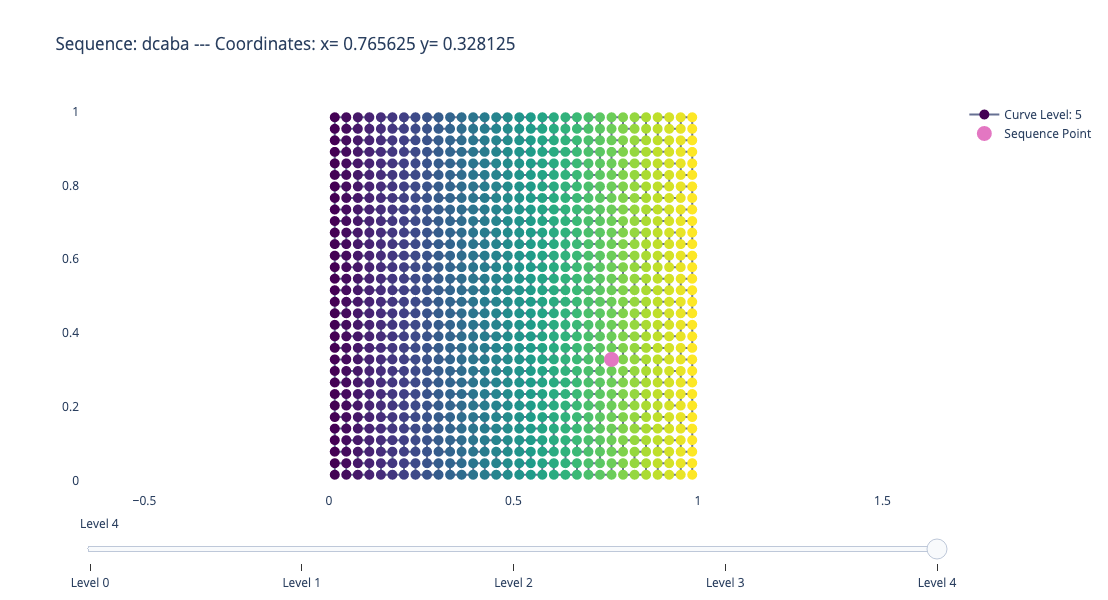

In [19]:
draw_curve('dcaba')